# **GEOTORM - A CLOSER LOOK AT TROPICAL STORM FROM 1900 - 2019**
### COM 3203 Digital and Data Journalism Group Project - Group 7
GAO Danning     55670207   


# **2.2 Method-Processing**
The main data of the tropical cyclone used in this step is downloaded from the EM-DAT international disaster database, and the lan-ocean temperature data is gotten from NASA. Since the data downloaded is clear enough in Excel form, the program in this step is relatively simple.

For our first and second analysis questions, we should get four information:
1.	the frequency of tropical cyclone in each year from 1900-2019
2.	the frequency of tropical cyclone in different levels each year from 2009-2019
3.	the frequency of tropical cyclone in each country each year from 1900-2019
4.	the lumpsum frequency of tropical cyclone in different countries from 1900-2019

Except the second one, we can get all the rest data through similar method. For instance, according to the third one, we import pandas, import the Excel file, skipping the first six meaningless rows, set the index as none, print the type and preview the raw data. Next, we select few useful columns and set a new DataFrame. Using groupby to polymerize ‘year’ and ‘country’, we count ‘country’ to get the frequency of tropical cyclone in each country each year, then re-create a cleaned DataFrame and save it. 


In [ ]:
#import the file
import pandas as pd
tr = pd.read_excel('C:/1900-2019.xlsx',skiprows=6,index_col=None)
print(type(tr))
#excrat several coloumns
tr1=tr[['Year','Country','Continent','Dis Mag Value','Dis Mag Scale']]
#get the national frequency for each year
groups=tr1.groupby(['Year','Country'])
c=groups['Country'].count()
tr2=pd.DataFrame({'Frequency':c})
tr2.to_excel('C:/1900-2019 nation frequency.xlsx')
tr2

<class 'pandas.core.frame.DataFrame'>


Frequency
Year Country                                  
1900 United States of America (the)          1
1902 Myanmar                                 1
1903 Jamaica                                 1
1904 Bangladesh                              1
1905 Philippines (the)                       1
...                                        ...
2019 Tanzania, United Republic of            1
     Thailand                                1
     United States of America (the)          3
     Viet Nam                                2
     Zimbabwe                                1

[1380 rows x 1 columns]

For extracting the data from a specific year, we can acquire the row and use index.tolist() [0] to convert that index to list then to int to get the row number, then using iloc to extract the DataFrame out.

In [ ]:
tr = pd.read_excel('C:/1900-2019 nation frequency.xlsx',index_col=None)
print(type(tr))
#get the row number of specific year
index = tr[tr.Year == 1960].index.tolist()[0]  
print(index)

<class 'pandas.core.frame.DataFrame'>
175


In [ ]:
index = tr[tr.Year == 1961].index.tolist()[0]  
print(index)

188


In [ ]:
#extract the data of specific year
tr1=tr.iloc[175:188]
tr1

,Year,Country,Frequency
175,1960.0,Anguilla,1
176,NaN,Antigua and Barbuda,1
177,NaN,Bangladesh,2
178,NaN,Hong Kong,1
179,NaN,Japan,1
180,NaN,Martinique,1
181,NaN,Netherlands Antilles,1
182,NaN,Niue,1
183,NaN,Philippines (the),5
184,NaN,Puerto Rico,1


The second one is more difficult for processing. Since DataFrame is easier for counting items, we try to separate it into several different DataFrame while screening. Setting year 2009 as an example, initially we need to screen different levels of tropical cyclone in 2009. Through function, we can filter them and then use loc to locate these data, getting seven new DataFrames. Next use shape to get the amount of items under different levels and recreate a DataFrame to display the final result. The same programing is used to extract the frequency of tropical cyclone in different levels in other years. Finally, through concat combine the DataFrame of each year and reset the index.

In [ ]:
import pandas as pd
import numpy as np
tr = pd.read_excel('C:/1900-2019.xlsx',skiprows=6,index_col=None)
print(type(tr))
tr1=tr[['Year','Country','Continent','Dis Mag Value','Dis Mag Scale']]

#extract the data in 2009
tr2009=tr1[(tr1['Year'] == 2009)]

#screen different levels of tropical cyclone and save them through loc
def asd(a):
    return 215 <= a 
tryy=tr2009.loc[tr2009['Dis Mag Value'].apply(asd)]

def asd4(e):
    return 209 <= e < 252
tryy4=tr2009.loc[tr2009['Dis Mag Value'].apply(asd4)]

def asd3(f):
    return 178 <= f < 209
tryy3=tr2009.loc[tr2009['Dis Mag Value'].apply(asd3)]

def asd2(g):
    return 154 <= g < 177
tryy2=tr2009.loc[tr2009['Dis Mag Value'].apply(asd2)]

def asd1(h):
    return 119 <= h < 154
tryy1=tr2009.loc[tr2009['Dis Mag Value'].apply(asd1)]

def asd0(i):
    return 63 <= i < 119
tryy0=tr2009.loc[tr2009['Dis Mag Value'].apply(asd0)]

def asd00(j):
    return 33 <= j < 63
tryy00=tr2009.loc[tr2009['Dis Mag Value'].apply(asd00)]

#count the item amount in each DataFrame
dis=tryy.shape[0]
dis4=tryy4.shape[0]
dis3=tryy3.shape[0]
dis2=tryy2.shape[0]
dis1=tryy1.shape[0]
dis0=tryy0.shape[0]
dis00=tryy00.shape[0]

#recreate a DataFrame 
tr7=pd.DataFrame({'Level 5':dis,'Level 4':dis4,'Level 3':dis3,
                 'Level 2':dis2,'Level 1':dis1,'Tropical Storm':dis0,
                 'Tropical Dpression':dis00},index=['2009'])


tr7.to_excel('C:/2009 Storm Level.xlsx')

tr7

<class 'pandas.core.frame.DataFrame'>


,Level 5,Level 4,Level 3,Level 2,Level 1,Tropical Storm,Tropical Dpression
2009,1,2,1,2,11,6,0


In [ ]:
tr1 = pd.read_excel('C:/2009 Storm Level.xlsx')
tr2 = pd.read_excel('C:/2010 Storm Level.xlsx')
tr3 = pd.read_excel('C:/2011 Storm Level.xlsx')
tr4 = pd.read_excel('C:/2012 Storm Level.xlsx')
tr5 = pd.read_excel('C:/2013 Storm Level.xlsx')
tr6 = pd.read_excel('C:/2014 Storm Level.xlsx')
tr7 = pd.read_excel('C:/2015 Storm Level.xlsx')
tr8 = pd.read_excel('C:/2016 Storm Level.xlsx')
tr9 = pd.read_excel('C:/2017 Storm Level.xlsx')
tr10 = pd.read_excel('C:/2018 Storm Level.xlsx')
tr11 = pd.read_excel('C:/2019 Storm Level.xlsx')
#combine the DataFrame
tr = pd.concat([tr1,tr2,tr3,tr4,tr5,tr6,tr7,
                tr8,tr9,tr10,tr11])
#rename the coloumn and reset the index
tr.rename(columns={'Unnamed: 0':'Year'}, inplace = True)
tr.set_index(["Year"], inplace=True)
tr.to_excel('C:/2009-2019 Storm Level.xlsx')
tr

,Level 5,Level 4,Level 3,Level 2,Level 1,Tropical Storm,Tropical Dpression
Year,,,,,,,
2009,1,2,1,2,11,6,0
2010,5,3,4,0,7,5,0
2011,3,1,1,2,5,4,0
2012,3,2,1,3,4,1,0
2013,4,1,2,2,2,4,0
2014,5,5,3,2,7,6,1
2015,7,6,6,2,1,1,0
2016,3,2,2,1,4,3,1
2017,11,5,1,1,9,6,0


# **2.3 Method-Visualization**
According to our analysis questions, we plan to use Wordcloud to show words frequency, line chart to show the trend of the tropical cyclone in temporal dimension and use map and bar chart to display the distribution of tropical cyclone in spatial dimension. To get more exquisite and accurate graphs, plotly, which can create interactive charts, is the ideal choice.


For the line chart, first we import plotly, and the module plotly.graph_objs under plotly. 

In [ ]:
import pandas as pd
tr1 = pd.read_excel('C:/2009-2019 Storm Level.xlsx')
import plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import Scatter

Since plotly cannot directly convert DaraFrame into graph, we need to transform them into Scatter, set the mode as lines and design the appearance of these lines. Then to integrate them, these traces should be put into a list. Through Layout, we set the layout of this line chart as dark theme to create a sense of science and technology, and finally upload it to my plotly studio account for. Several lines which cannot display an obvious trend are omitted.

In [ ]:
#rename cloumns to avoid error
tr1.rename(columns={'Level 5':'Level5'}, inplace = True)
tr1.rename(columns={'Level 4':'Level4'}, inplace = True)
tr1.rename(columns={'Level 3':'Level3'}, inplace = True)
tr1.rename(columns={'Level 2':'Level2'}, inplace = True)
tr1.rename(columns={'Level 1':'Level1'}, inplace = True)
tr1.rename(columns={'Tropical Storm':'TropicalStorm'}, inplace = True)
tr1.rename(columns={'Tropical Dpression':'TropicalDpression'}, inplace = True)

#convert them into Scatter
tracel = Scatter(x = tr1['Year'], y = tr1['Level5'],mode='lines',
                  name='Level 5',line = dict(width=3.5,color="#71EFFE",shape="spline"))
trace2 = Scatter(x = tr1['Year'], y = tr1['Level4'],mode='lines',
                 name='Level 4',line = dict(width=3.5,color="#26CAF0",shape="spline"))
trace4 = Scatter(x = tr1['Year'], y = tr1['Level2'],mode='lines',
                 name='Level 2',line = dict(width=3.5,color="#F61718",shape="spline"))
trace5 = Scatter(x = tr1['Year'], y = tr1['Level1'],mode='lines',
                 name='Level 1',line = dict(width=3.5,color="#FF4747",shape="spline"))
data = [tracel,trace2,trace4,trace5]

#set layout
layout = go.Layout(title="<br><i>The Trend of Tropical Cyclone in Different Levels 2000-2019</i>",titlefont=dict(size=24,color='#72798C',family = "Times New Roman",),
                   legend=dict(x=1,y=1,font=dict(size=19,color='#72798C',family = "Times New Roman")),
                   xaxis=dict(title='Year',
                              linecolor="#4C4E50",
                              gridcolor="#4C4E50",
                              titlefont=dict(size=19,color='#72798C',family = "Times New Roman"),
                              tickfont=dict(size=17,color='#72798C',family = "Times New Roman")),
                   yaxis=dict(title='Frequency',
                              linecolor="#4C4E50",
                              gridcolor="#4C4E50",
                              titlefont=dict(size=19,color='#72798C',family = "Times New Roman"),
                              tickfont=dict(size=17,color='#72798C',family = "Times New Roman")),
                   plot_bgcolor='#1F2630',paper_bgcolor="#1F2630")

#output the chart
fig = go.Figure(data = data,layout = layout)

#offline plot a graph in html format
pyplot = py.offline.plot
pyplot(fig)

#upload it to my account
import chart_studio
username = 'haodebala'
api_key = 'xxxxxxx' #my api
chart_studio.tools.set_credentials_file(username=username,api_key=api_key)
import chart_studio.plotly as py
import chart_studio.tools as tls
py.plot(fig,filename = 'leveltrend',auto_open=True)

For bar and marker chart, the method is the same. We only need to convert DaraFrame into Bar, or Scatter, setting mode as "markers".

To create map, go.Choropleth is used to provide graph object. However, to project the data in different countries, we still need ISO 3166-1 alpha-3 codes for each country. After get all the country name in a specific year, we import the library pycountry, which can project these names into ISO codes.

In [ ]:
tr = pd.read_excel('C:/1960 world distribution.xlsx',index_col=None)
print(type(tr))
tr['Country'].values.tolist()

<class 'pandas.core.frame.DataFrame'>


['Anguilla',
 'Antigua and Barbuda',
 'Bangladesh',
 'Hong Kong',
 'Japan',
 'Martinique',
 'Netherlands Antilles',
 'Niue',
 'Philippines (the)',
 'Puerto Rico',
 'Saint Lucia',
 'Taiwan (Province of China)',
 'United States of America (the)']

In [ ]:
import pycountry

input_countries = ['Anguilla',
 'Antigua and Barbuda',
 'Bangladesh',
 'Hong Kong',
 'Japan',
 'Martinique',
 'Netherlands Antilles',
 'Niue',
 'Philippines (the)',
 'Puerto Rico',
 'Saint Lucia',
 'Taiwan (Province of China)',
 'United States of America (the)']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]

print(codes) 

['AIA', 'ATG', 'BGD', 'HKG', 'JPN', 'MTQ', 'Unknown code', 'NIU', 'Unknown code', 'PRI', 'LCA', 'Unknown code', 'Unknown code']


Nevertheless, there are some names cannot be identified by the library, then we need manually modify them into the right form and create a new column putting these code in DataFrame.

In [ ]:
import pycountry

input_countries = ['Anguilla',
 'Antigua and Barbuda',
 'Bangladesh',
 'Hong Kong',
 'Japan',
 'Martinique',
 'Netherlands Antilles',
 'Niue',
 'Philippines',
 'Puerto Rico',
 'Saint Lucia',
 'Taiwan, Province of China',
 'United States']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]

print(codes) 

['AIA', 'ATG', 'BGD', 'HKG', 'JPN', 'MTQ', 'Unknown code', 'NIU', 'PHL', 'PRI', 'LCA', 'TWN', 'USA']


In [ ]:
tr['CODE']=['AIA', 'ATG', 'BGD', 'HKG', 'JPN', 'MTQ', 'ANT', 'NIU', 'PHL', 'PRI', 'LCA', 'TWN', 'USA']
tr

,Unnamed: 0,Year,Country,Frequency,CODE
0,175,1960.0,Anguilla,1,AIA
1,176,NaN,Antigua and Barbuda,1,ATG
2,177,NaN,Bangladesh,2,BGD
3,178,NaN,Hong Kong,1,HKG
4,179,NaN,Japan,1,JPN
5,180,NaN,Martinique,1,MTQ
6,181,NaN,Netherlands Antilles,1,ANT
7,182,NaN,Niue,1,NIU
8,183,NaN,Philippines (the),5,PHL
9,184,NaN,Puerto Rico,1,PRI


After the converting step, we accidentally found that in the raw data, the ISO code already exists. Then we go back and save that column for visualization. The rest step is simple, setting location as ISO, z as frequency and text as country. After changing it into dark theme and beautifying some items like font. In addition, we should set all the colorbar within the same range for clearer illustration. Finally, the distribution maps are gotten.

In [ ]:
tr2 = pd.read_excel('C:/1960 world distribution_.xlsx',index_col=None)
fig = go.Figure(data=go.Choropleth(
    locations = tr2['ISO'],
    z = tr2['Frequency'],
    text = tr2['Country'],
    colorscale = [[0, '#01171C'], [0.5, '#71EFFE'], [1.0, '#ECFEFF']],
    autocolorscale=False,
    reversescale=False,
    marker_line_color='#252E3F',
    marker_line_width=0.1,
    colorbar_title = 'Frequency',colorbar_titlefont=dict(color='#72798C'),
    colorbar_tickfont=dict(color='#72798C'),
    colorbar_thickness=20))
fig.update_layout(title='<br><i>1960 Global Tropical Cyclone Frequency Distribution</i>',
                  titlefont=dict(size=25,family = "Times New Roman",color='#72798C'),
                  geo=dict(showframe=False,
                           showcoastlines=False,
                           projection_type='equirectangular',
                           bgcolor= 'rgba(0,0,0,0)',
                           lakecolor='#252E3F',
                           landcolor='#1E232D',
                           subunitcolor='#252E3F'),
                  annotations = [dict(x=0.55,y=0.001,
                                      xref='paper',yref='paper',
                                      text='Data Source: <a href="https://www.emdat.be/">EM-DAT Database</a>',
                                      showarrow = False)],
                  paper_bgcolor='#252E3F',plot_bgcolor='#252E3F')
pyplot = py.offline.plot
pyplot(fig)
#upload it to my account
import chart_studio
username = 'haodebala'
api_key = 'xxxxxxx' #my api
chart_studio.tools.set_credentials_file(username=username,api_key=api_key)
import chart_studio.plotly as py
import chart_studio.tools as tls
py.plot(fig,filename = '1960map',auto_open=True)

# **3.** **Discussion**
# **3.1 Chronological Trend**
According to the line chart, an overall rising trend of tropical cyclone is transparent from 1900-2019. This line reaches its peak, 74 times a year, thrice in recent two decades, respectively in 2004, 2008 and 2017. 

Click here to see an interactive chart. https://chart-studio.plotly.com/~haodebala/1







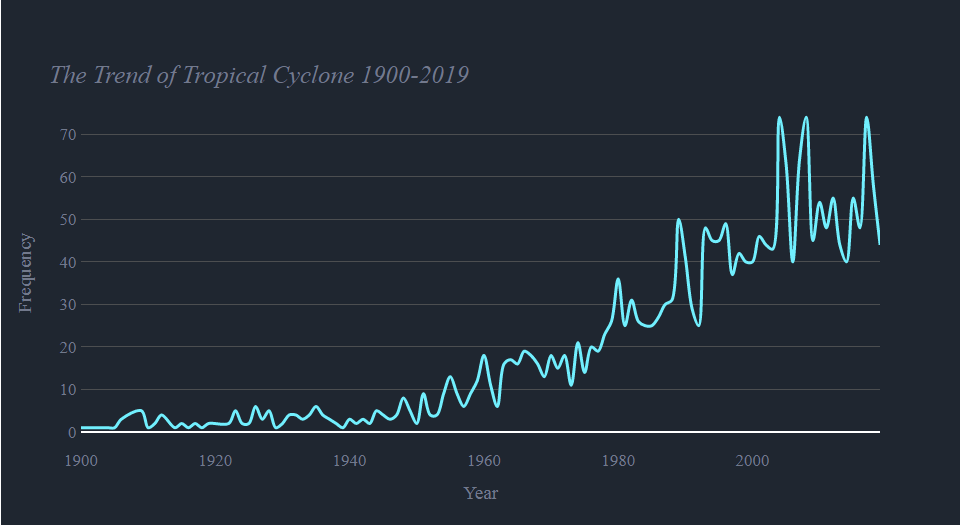

From this line chart, it displays slight rising trends of higher levels tropical cyclone (level 5 and level 4) from 2009 to about 2018, while a sharp decline appears in recent two years. Lower levels of tropical cyclone (level 2 and level 1), separately has a relatively decreasing trend since 2009 and 2012, however, fluctuates and resiles in recent years.
Click here to see an interactive chart. https://chart-studio.plotly.com/~haodebala/5

 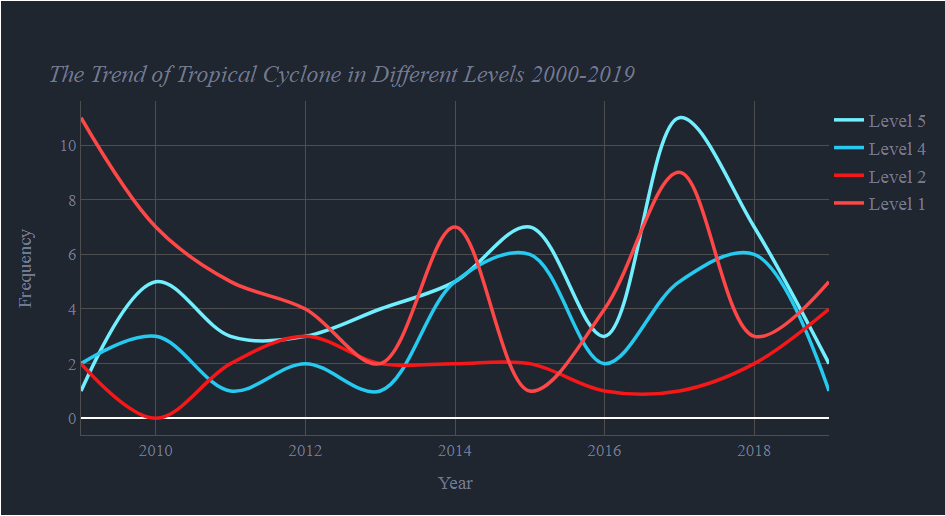

# **3.2 Geographical Distribution**
Choropleth maps show the distribution of tropical cyclone at intervals of five years since 1960. 
Click here to see an interactive map of 2018. https://chart-studio.plotly.com/~haodebala/12


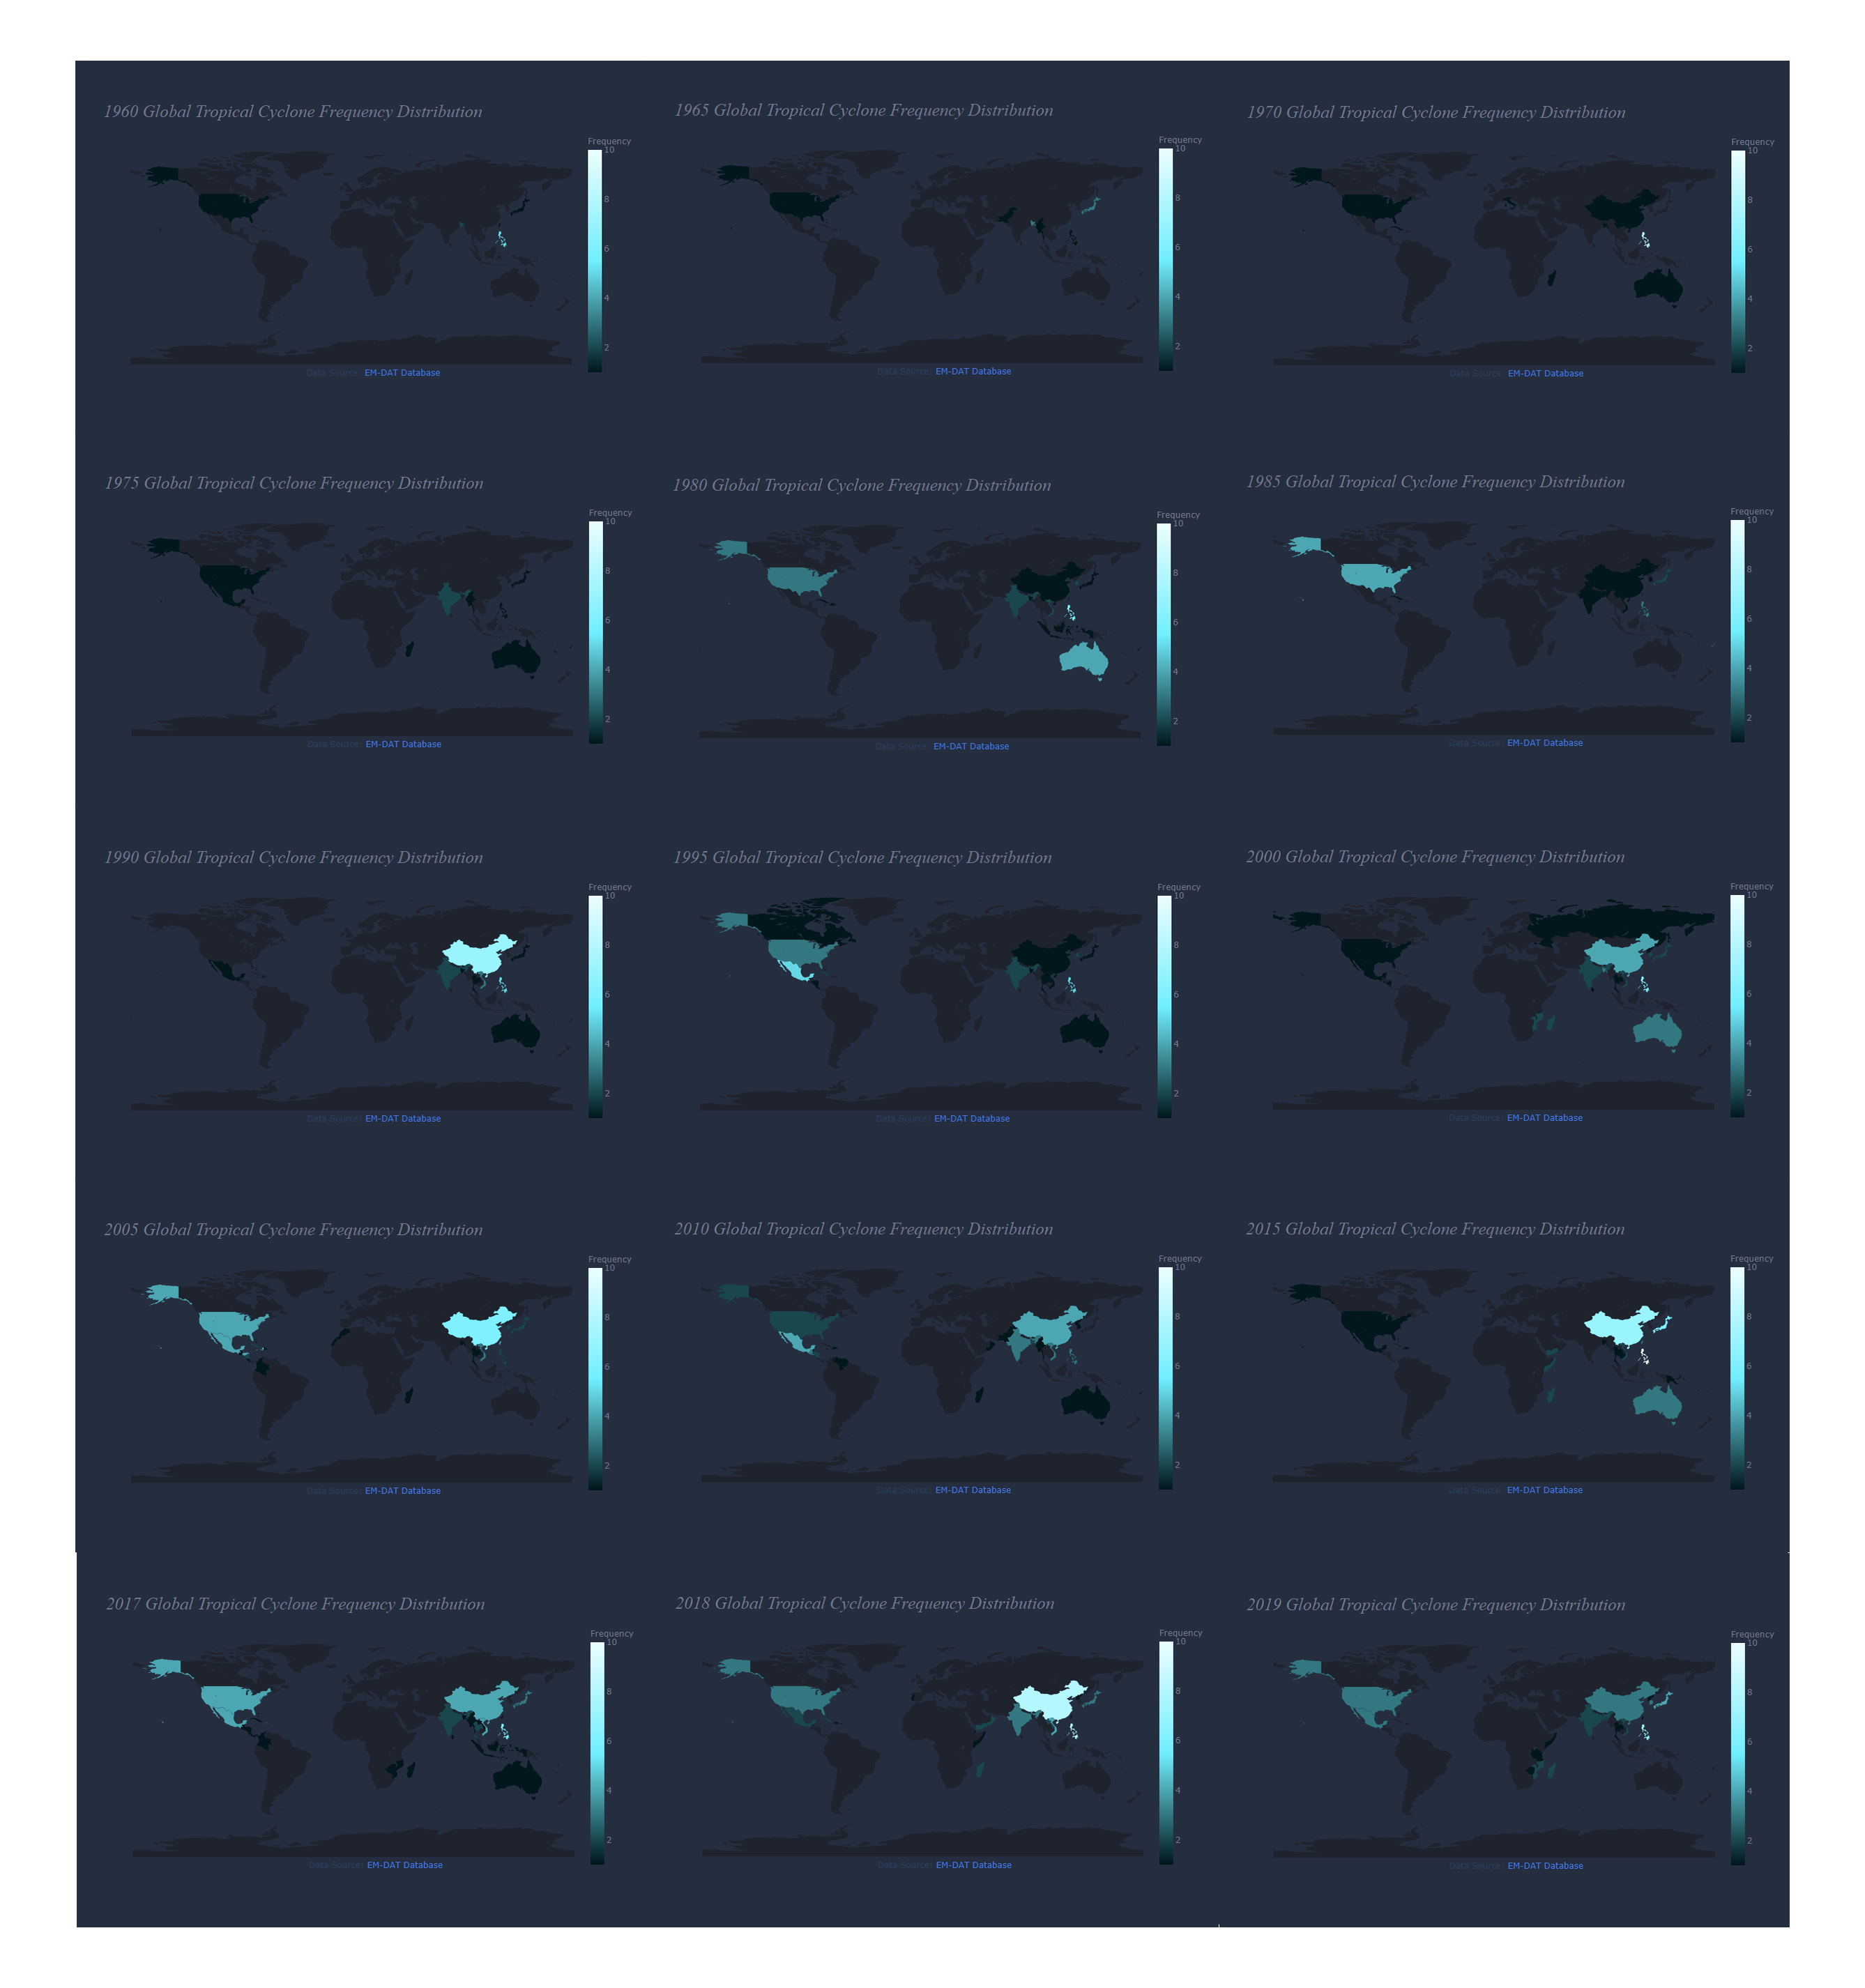

From the maps, the distribution areas of tropical cyclone has an obvious expansion in previous one hundred years. Southeast Asia, North America, Oceania, and East Africa are the main affected areas. From this, we can speculate that the main origions of tropical cyclone come from Northwest Pacific Ocean, Northeast Pacific Ocean, North Atlantic Ocean,Sounthwest Pacific Ocean and North Indian Ocean.

From the bar chart, which shows the top 20 countries with most times of tropical cyclone over one hundred and twenty years, we can get similar conclusion. Click here to see an interactive chart. https://chart-studio.plotly.com/~haodebala/8

 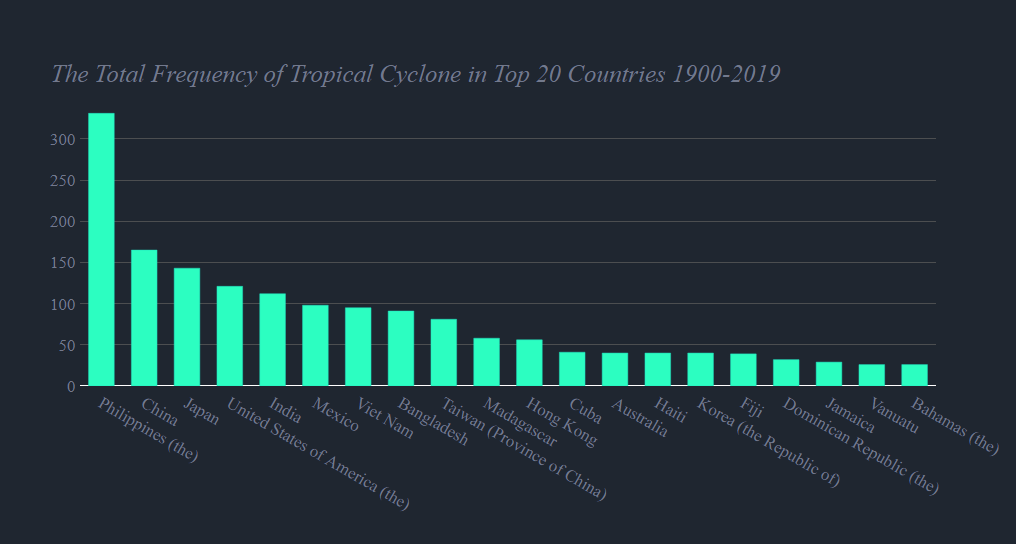

And there is a significant frequency difference between the top country and the rest. The tropical cyclone frequency of the top country, Philippines, is double the frequency of the country in second place, China, exceeding three hundred times from 1900 to 2019.
# **3.3	Tropical Cyclone & Global Warming**

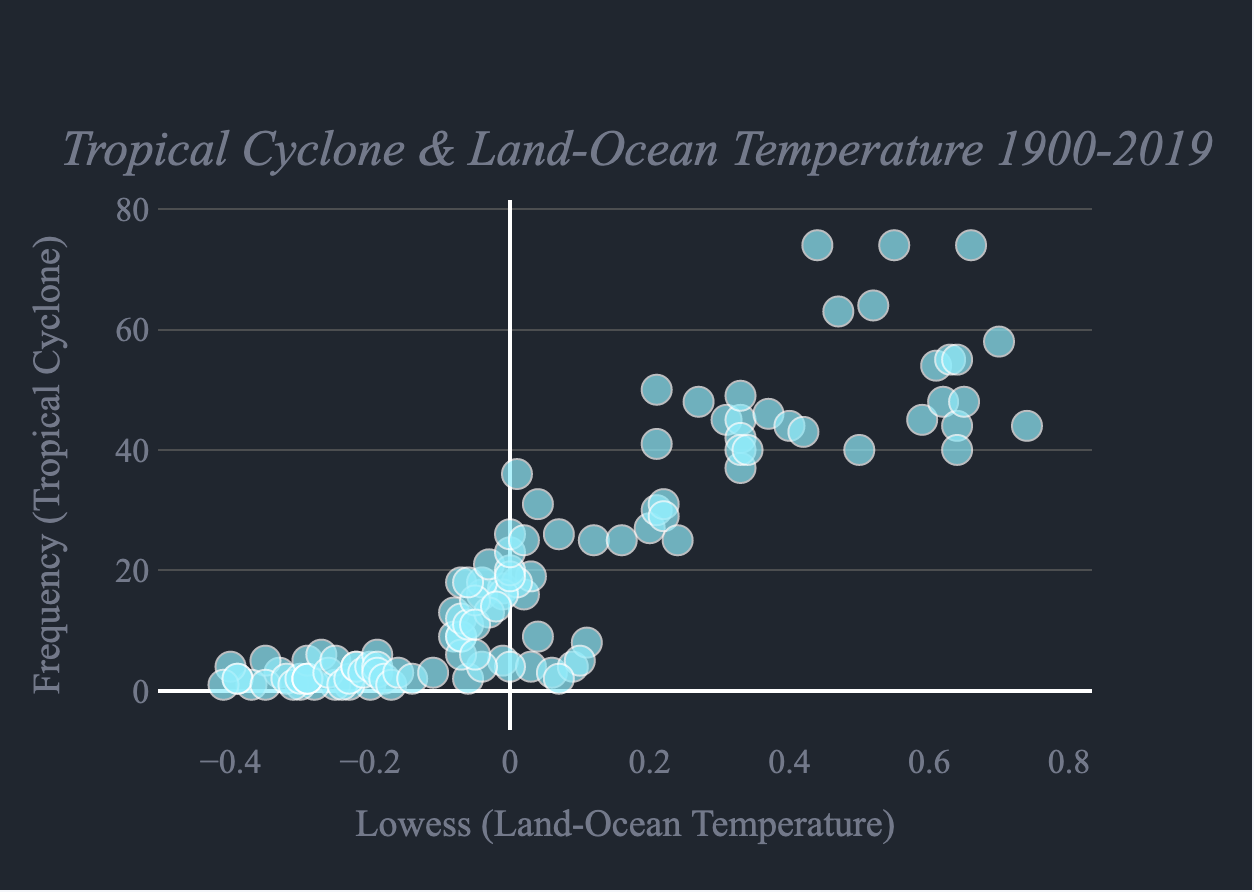

After plotting the relationship between land-ocean temperature and tropical cyclone frequency, there is an obvious positive correlation displayed. Plus, a sharp increase starting from about the zero line worths attention. 
Click here to see an interactive chart. https://chart-studio.plotly.com/~haodebala/14

Through this wordcloud, it is obvious that tropical cyclone will appear with floods, greenhouse gas emmisions, environment and so on, which means that in addition to being linked to global warming, tropical cyclone may also be linked to floods, greenhouse gas, environment. It gives us an inspiration to do further research.

# **4. Difficulties & Limitations**



# **4.2 Data Processing**
There is sole but severe problem in this step. The accuracy of trend of tropical cyclone under different levels is uncertain. Before extracting the frequency of tropical cyclone under different levels, we found there is relatively high-percent and uneven data missing in the column, ‘Dis Mag Value’. To minimize the influence, we only count the frequency in last decade, which equips a relatively similar data ratio. Despite this, the result from partial statistics of tropical cyclone frequency under different levels is questionable.
# **4.3 Data Visualization**
The accuracy of the distribution map can be improved. In our project, the smallest unit is nation. For countries with large land scape, such as United States, Russia and China, the specific affected regions can not be displayed. Nevertheless, to realize it, we need to extract the names of states or provinces and use other map library which contain more detailed maps for each country for visualization. Therefore, more efforts are expected for extracting the city names and choosing map libraries.